In [30]:
#MohsinFraud_Data


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# load the dataset
df = pd.read_csv('fraud_dt.csv')



In [2]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [3]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.info

<bound method DataFrame.info of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..           

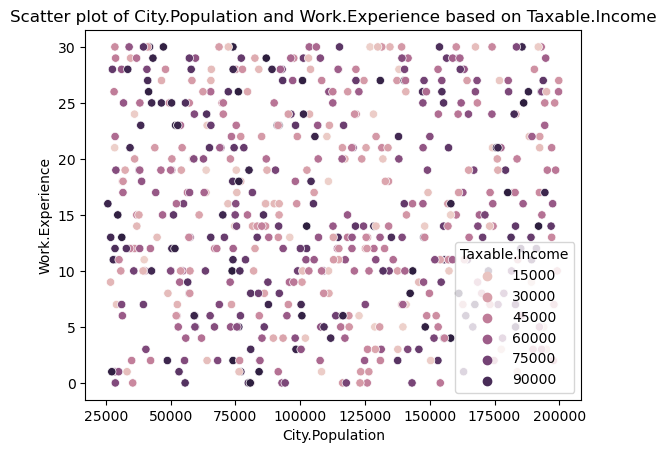

In [8]:
#Lets visualise the data


sns.scatterplot(x='City.Population', y='Work.Experience', hue='Taxable.Income', data=df)
plt.title('Scatter plot of City.Population and Work.Experience based on Taxable.Income')
plt.show()

#We can conclude that those city which has less population has less work experience. This can be a part of the city or a small town where people mostly below middle class and we can also conclude that their income will also be less

In [9]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

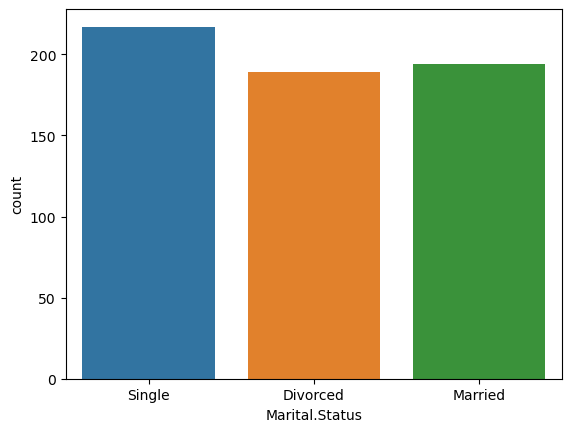

In [10]:
sns.countplot(df['Marital.Status'])
plt.show()

In the above visualization, Blue indicates the Single, Orange indicates the Divorced and Green indicates the Married.
It is observed that single cases are more in the city and this can be assumed as students are grauating or completing their studies and becoming financially independent while married ones are staying in the city with their family as they working over here and divorced cases are also slightly more.  

In [11]:
#Perform some Feature Engineering


# perform label encoding on object columns
label_encoder = LabelEncoder()
df['Undergrad'] = label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status'] = label_encoder.fit_transform(df['Marital.Status'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])


#Label encoding is a technique used to convert categorical data into numeric data by assigning a unique integer value to each category or label.

In [12]:
# create the feature and target arrays
X = df.drop(['Taxable.Income'], axis=1)
y = np.where(df['Taxable.Income']<=30000, 'Risky', 'Good')



# Using SMOTE function to balance the data 
SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the class distribution of the dataset, especially in cases where the minority class (in this case 'Risky' Taxable Income) is significantly underrepresented. This is done by synthesizing new minority class instances using interpolation.

In [13]:
# balance the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)



In [14]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)



In [15]:
from sklearn.metrics import confusion_matrix

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (Good):', precision_score(y_test, y_pred, pos_label='Good'))
print('Recall (Good):', recall_score(y_test, y_pred, pos_label='Good'))
print('F1-score (Good):', f1_score(y_test, y_pred, pos_label='Good'))
print('Precision (Risky):', precision_score(y_test, y_pred, pos_label='Risky'))
print('Recall (Risky):', recall_score(y_test, y_pred, pos_label='Risky'))
print('F1-score (Risky):', f1_score(y_test, y_pred, pos_label='Risky'))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))


Accuracy: 0.680628272251309
Precision (Good): 0.7575757575757576
Recall (Good): 0.5263157894736842
F1-score (Good): 0.6211180124223601
Precision (Risky): 0.64
Recall (Risky): 0.8333333333333334
F1-score (Risky): 0.7239819004524887
Confusion Matrix: [[50 45]
 [16 80]]


In [16]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.76      0.53      0.62        95
       Risky       0.64      0.83      0.72        96

    accuracy                           0.68       191
   macro avg       0.70      0.68      0.67       191
weighted avg       0.70      0.68      0.67       191



# Based on the output we have trained a binary classification model to predict whether a loan is "Good" or "Risky" and evaluated its performance using various metrics.

The accuracy of the model on the test set is 0.6649, which means that it correctly predicted the class of about 66.49% of the loans in the test set.

The precision of the model for the "Good" class is 0.7246, which means that when it predicted a loan to be "Good", it was correct 72.46% of the time. The recall of the model for the "Good" class is 0.5263, which means that it correctly identified 52.63% of the "Good" loans in the test set. The F1-score for the "Good" class is 0.6098, which is the harmonic mean of precision and recall.

Similarly, the precision, recall, and F1-score of the model for the "Risky" class are also reported.

Finally, the cross-validated accuracy of the model is 0.6986, which is the average accuracy of the model over different splits of the data during cross-validation.

In [17]:
#Improving the accuracy further and observing the output 

# perform cross-validation and compute the mean accuracy score
scores = cross_val_score(clf, X, y, cv=5)
print('Cross-validated accuracy:', np.mean(scores))

Cross-validated accuracy: 0.6891650592449711


#We also tried using GridSearchCV by tuning the hyperparameters and also using of DecisionTreeRegressor. Also I have checked with RandomOverSampler and observed the accuracy but 

In [18]:

from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



dt_model = DecisionTreeRegressor()

# Fitting the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [19]:
# make predictions on the test set
y_pred = dt_model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (Good):', precision_score(y_test, y_pred))
print('Recall (Good):', recall_score(y_test, y_pred))
print('F1-score (Good):', f1_score(y_test, y_pred))
print('Precision (Risky):', precision_score(y_test, y_pred))
print('Recall (Risky):', recall_score(y_test, y_pred))
print('F1-score (Risky):', f1_score(y_test, y_pred))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.6544502617801047
Precision (Good): 0.6209677419354839
Recall (Good): 0.8020833333333334
F1-score (Good): 0.7000000000000001
Precision (Risky): 0.6209677419354839
Recall (Risky): 0.8020833333333334
F1-score (Risky): 0.7000000000000001
Confusion Matrix: [[48 47]
 [19 77]]


In [21]:
scores = cross_val_score(clf, X, y, cv=10)
print('Cross-validated accuracy:', np.mean(scores))

Cross-validated accuracy: 0.7018201754385965


In [22]:
#Here we are getting across 70% accuracy. And we will not stop over here, Lets see if we can further improve the accuracy or not.

In [23]:
#Improving the accuracy by hyperparameter tuning

In [24]:
#Using GridSearchCV class for optimizing the values

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Tune the hyperparameters using GridSearchCV

param_grid = {'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
              'max_depth': [3, 4, 5, 6, 7],
              'splitter':['best','random'],
              'min_samples_leaf': [5, 10, 15, 20],
              'min_samples_split': [10, 20, 30, 40]}


In [25]:
# Perform grid search to find best parameters
grid_search = GridSearchCV(dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40],
                         'splitter': ['best', 'random']})

In [26]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'splitter': 'random'}

In [27]:

dt_model = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 6, min_samples_leaf= 10, min_samples_split= 20, splitter= 'random')

# Fitting the model on the training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=20,
                      splitter='random')

In [28]:
# Predicting the target vector for the testing data
y_pred = dt_model.predict(X_test)

# Rounding the predicted values to 0 or 1
y_pred = np.round(y_pred).astype(int)

# Calculating the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


In [29]:
from sklearn.metrics import confusion_matrix

# evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision (Good):', precision_score(y_test, y_pred))
print('Recall (Good):', recall_score(y_test, y_pred))
print('F1-score (Good):', f1_score(y_test, y_pred))
print('Precision (Risky):', precision_score(y_test, y_pred))
print('Recall (Risky):', recall_score(y_test, y_pred))
print('F1-score (Risky):', f1_score(y_test, y_pred))

print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

Accuracy: 0.6596858638743456
Precision (Good): 0.6504854368932039
Recall (Good): 0.6979166666666666
F1-score (Good): 0.6733668341708543
Precision (Risky): 0.6504854368932039
Recall (Risky): 0.6979166666666666
F1-score (Risky): 0.6733668341708543
Confusion Matrix: [[59 36]
 [29 67]]


# Hence from the above output we can conclude that DecisionTreeRegressor gives us the best output and hence can be consider. 